<a href="https://colab.research.google.com/github/PhaniChandraSekhar/AIML_Practice/blob/main/Instrumenting_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U3W14_48_Instrumenting_CNN_A" #name of the notebook
from IPython.display import HTML, display

ipython.magic("sx pip3 install torch")
ipython.magic("sx pip3 install torchvision")
print ("Setup completed successfully")












Setup completed successfully


Description
The dataset contains 60,000 Handwritten digits as training samples and 10,000 Test samples, which means each digit occurs 6000 times in the training set and 1000 times in the testing set.
Each image is Size Normalized and Centered
Each image is 28 X 28 Pixel with 0-255 Gray Scale Value.
That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.

History
Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.

Challenges
Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. To teach a machine to recognize these patterns and identify the correct output.

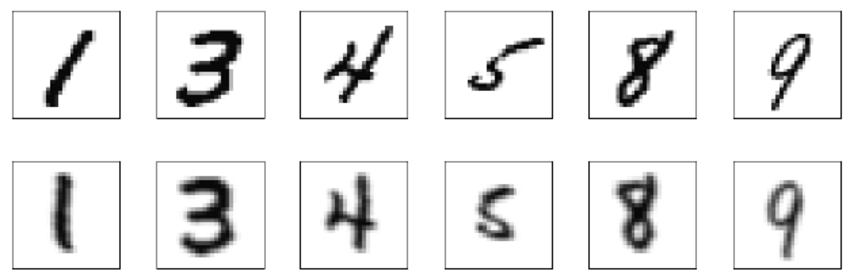

Hence, all these challenges make this a good problem to solve in Machine Learning.

**Domain Information:** Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

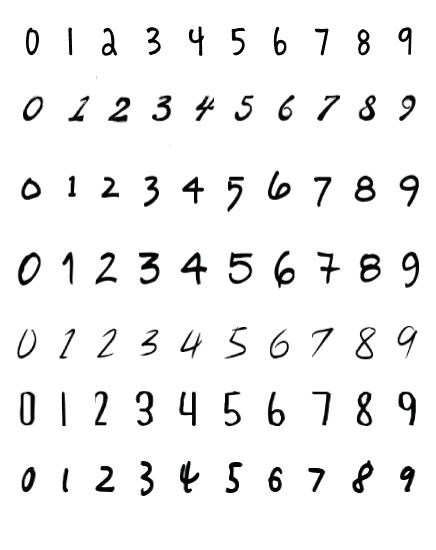

**AI/ML Technique**: A neural network is a system of interconnected artificial “neurons” that exchange messages between each other. The connections have numeric weights that are tuned during the training process, so that a properly trained network will respond correctly when presented with an image or pattern to recognize. A network consists of multiple layers of feature-detecting “neurons”. Each layer has many neurons that respond to different combinations of inputs from the previous layers

# CNN (Convolutional Neural Network)

CNN is also referred to as ConvNets. They are part of neural networks that have proven effective in areas as image classification and recognition.

While building or training the CNN network we follow below steps :

We start with an input image.

Then we try to apply filters or feature maps to the image, which gives us a convolutional layer.

Then we break up the linearity of that image using the rectifier function. The image becomes ready for the pooling step.

Once we're done with the pooling layer, we end up with a pooled feature map.

Finally, we try to flatten our pooled feature map before inserting it into an artificial neural network.

By following the above steps recurrently, we get the network's building blocks, like the weights and the feature maps, are trained and repeatedly altered in order for the network to reach the optimal performance. This will make the network to classify images and objects as accurately as possible.



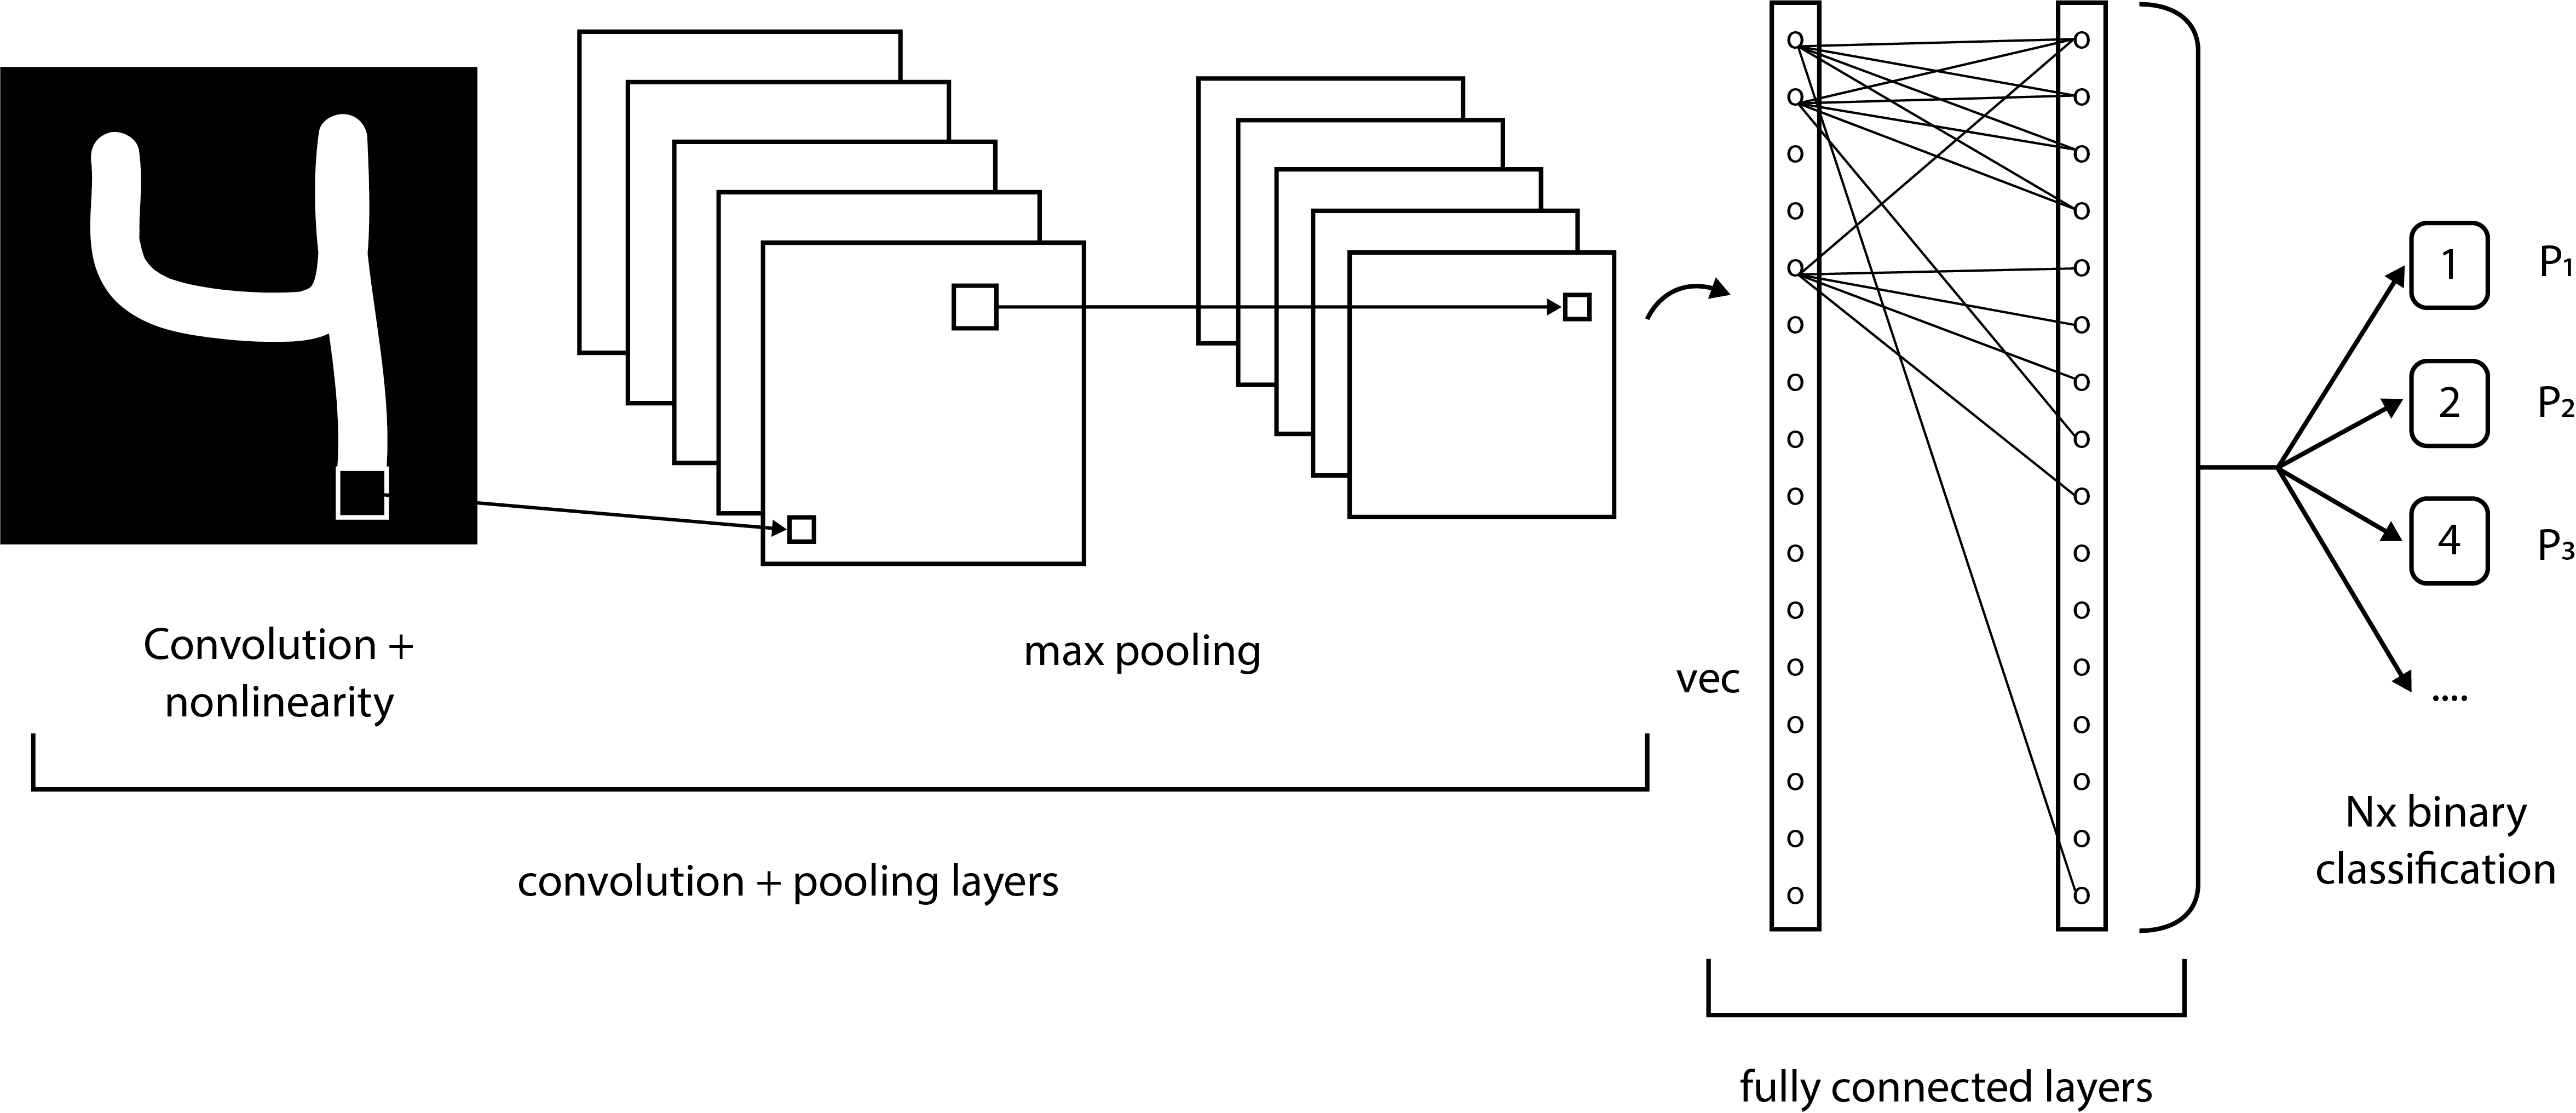

While working on the experiment you will be able to understand different layers involved in CNN's architecture and their importance.

In this experiment, we build a neural network consisting of convolutional, pooling and fully connected layers to classify handwritten digits of the MNIST dataset.

CNN programming involves the following steps:

Load the data
Specify a Neural Network Model
Specify the loss function and optimizer
Train the model and compute the accuracy on the training dataset
Compute the accuracy on the testing dataset

# Importing required packages

In [2]:
# Importing Pytorch library
import torch.nn as nn
import torch.nn.functional as F

import torch
import torchvision
from torchvision import datasets, transforms

# Matplotlib is used for ploting graphs
import matplotlib.pyplot as plt

# Loading the data

The database contains 60,000 training images and 10,000 testing images each of size 28x28. Loading the dataset can be easily done through the torch.utils package. The dataset is downloaded automatically when you run the below cell for the first time.

In [3]:
# Normalize with mean and std ( 0.1307 and 0.3081 are the mean and std of MNIST data )
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
# Loading the train set file
mnist_train = datasets.MNIST(root='../data',
                            train=True,
                            transform=transform,
                            download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.00MB/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 158kB/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.88MB/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [5]:
# Loading the test set file
mnist_test = datasets.MNIST(root='../data',
                           train=False,
                           transform=transform)

Let’s visualize a few data from the training set to get a better idea about the purpose of using the deep learning model.

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Shape of the training data (no of images, height, width) :  torch.Size([60000, 28, 28])
Shape of the testing data (no of images, height, width) :  torch.Size([10000, 28, 28])


#### An Example Image, Label pair #####


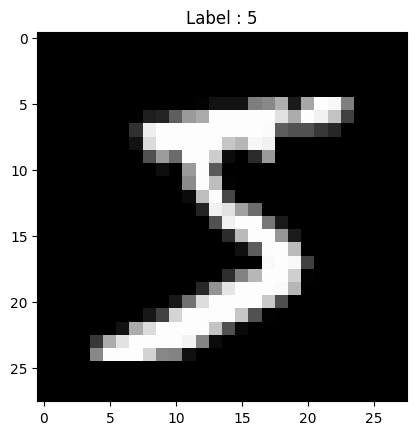

In [6]:
# Plotting one example
print("Shape of the training data (no of images, height, width) : ", mnist_train.train_data.size()) # (60000, 28, 28)
print("Shape of the testing data (no of images, height, width) : ", mnist_test.test_data.size())  # (10000, 28, 28)
print("\n")
print("#### An Example Image, Label pair #####")
plt.imshow(mnist_train.train_data[0].numpy(), cmap='gray')
plt.title('Label : %i' % mnist_train.train_labels[0])
plt.show()
# YOUR CODE HERE : Plot one image from the training set as a gray scale image.

Minibatch

The Machine learning dataset can be really large. Hence we cannot often load the entire data into the memory. Hence neural network training is done by loading small batches (commonly called minibatch) of data and using it to update the learnable parameters (weights and biases) of the model.

In [7]:
# The mini batch size used for training
batch_size = 1000

# Loading the train dataset
# Data Loader loads the images and corresponding labels of defined mini batch size.
# the image batch shape will be (batch_size, 1, 28, 28)
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                           batch_size=batch_size,
                                           shuffle=True)

# Loading the test dataset
# Data loader will behave like an iterator, so we can loop over it and fetch a different mini-batch every time.
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=True)

Let’s visualize a few images in the mini batch of training set

Mini batch size: images - torch.Size([1000, 1, 28, 28])  labels -  torch.Size([1000])
torch.Size([1, 28, 28]) tensor(0)


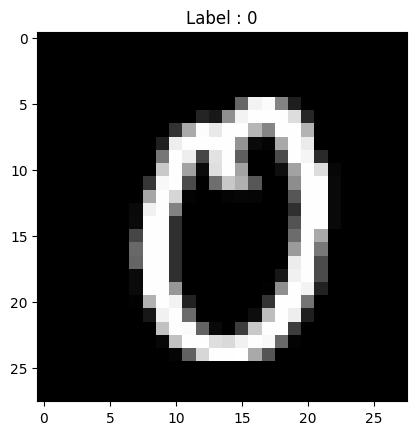

torch.Size([1, 28, 28]) tensor(0)


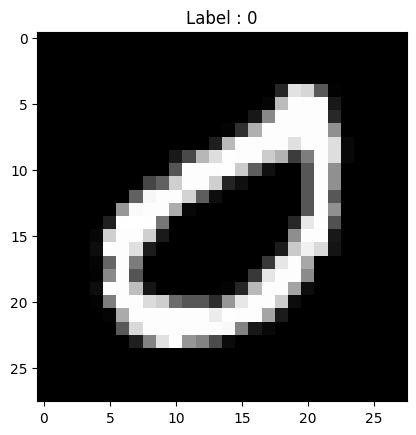

1
Mini batch size: images - torch.Size([1000, 1, 28, 28])  labels -  torch.Size([1000])
torch.Size([1, 28, 28]) tensor(3)


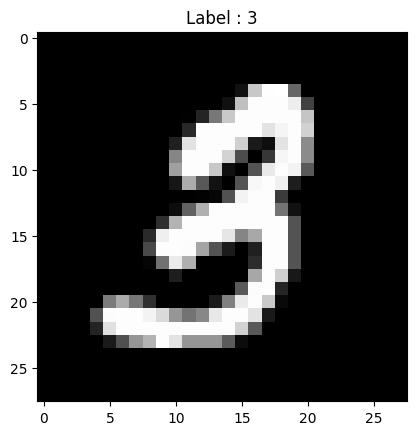

torch.Size([1, 28, 28]) tensor(0)


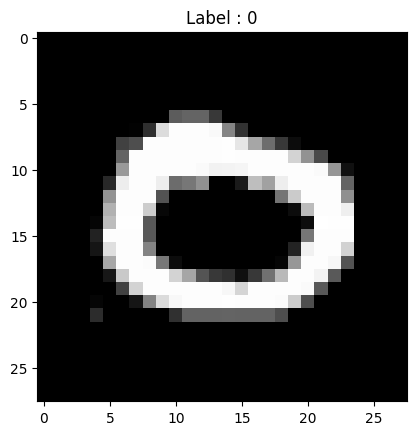

1


In [8]:
batch_count = 0
for mini_batch in train_loader:
    images, labels = mini_batch
    print('Mini batch size: images -', images.size(), ' labels - ', labels.size())
    for j in range(5):  # Basically iterating a few times (hence range(5)) to print a few images in this mini-batch
        print(images[j].size(), labels[j])
        plt.imshow(images[j][0].numpy(), cmap='gray')
        plt.title('Label : %i' % labels[j])
        plt.show()

        # To plot only 2 images from each batch, applied logic to break out of the loop at range = 1.
        if j == 1:
            print(j)
            break

    # If you want to visualize images in the next mini-batches you can increase the Batch count value.
    if batch_count == 1:
        break

    batch_count +=1

# Defining a CNN based Neural Network

Now we will define a CNN based neural network, that takes the input as 28x28 MNIST images and predicts a label from 0 to 9. The predictions will be of the form of a probability distribution given as an array  P  of length 10, where each entry  Pi  denotes the probability of the input image being the digit  i .

We will divide the neural network into two parts. First is the feature extractor, which given the 28x28 images, gives a feature vector. The feature extractor is a CNN based neural network. Second is a classifier, which takes the feature vector as input and produces a 10 dimensional vector called the logits. Finally the logits are converted in the prediction probabilities by applying the softmax function

The Deep CNN we will be using is called LeNet. A pictorial representation is given below:
**NOTE: The diagram below assumes the image of size 32 * 32, however, MNIST is 28 * 28; So the diagram is not a representation of the problem dataset, but a LeNet architecture in general. It could however be treated as an interesting exercise for you to recompute each of the layers gives the slight change in the input dimension. ** ****

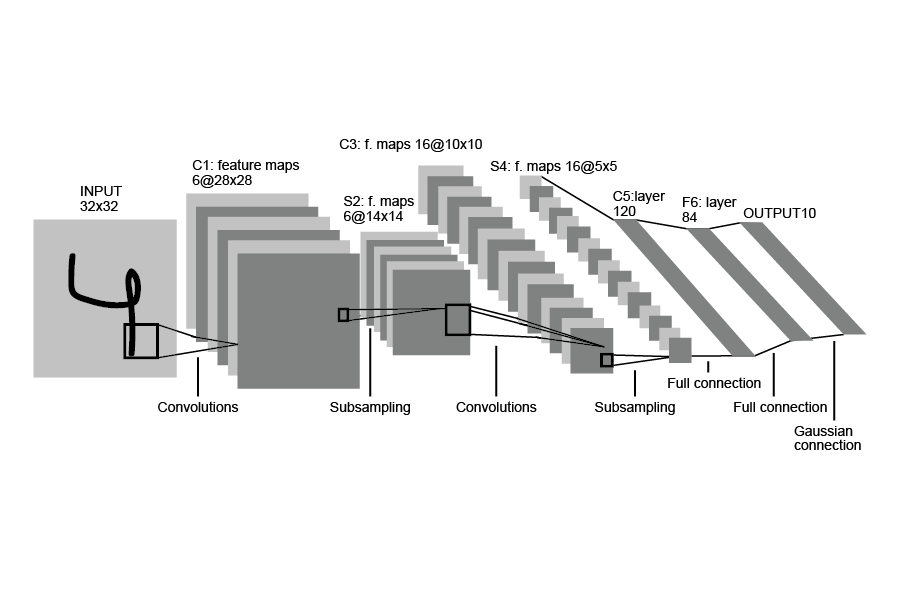

As you can see, the neural network has multiple operations happening one after another. Each operation has learnable parameters (weights and biases). Typically we call them the layers of a neural network. Neural networks can have many layers, and are hence called Deep Neural Networks (DNNs) or Deep CNNs.

LeNet feature extractor shown above has the following layers:

Convolutional layer which:
takes an image with 1 channel (since MNIST digits are black and white; for color images, they are represented by 3 channels giving the intensities of Red, Blue and Green) : 1x28x28
convolves with 6 filters (weights) of kernel size 5x5 and stride 1
without padding
so, gives a 6x24x24 tensor as output
Subsampling or MaxPooling (which reduces the height and width by half). Here we are doing 2x2-MaxPooling which takes the maximum value of every non-overlapping 2x2 window: outputs a 6x12x12 tensor
ReLU activation function applied to every entry of the tensor
Convolutional layer which:
takes a tensor with 6 channels: 6x12x12
convolves with 16 filters of kernel size 5x5 and stride 1
so, gives a 16x8x8 tensor as output
MaxPooling: gives a 16x4x4 tensor as output
ReLU

Note that the output of the below neural network is a 3D tensor. This is because the input is a 3D tensor (with one dimension =1) and Convolutional and Max-Pooling layers give 3D tensors as output. Next, we will reshape this 3D tensor into a long vector and pass it through the classifier network. The Classifier network is typically a Multi-Layered Perceptron Network that you have seen previously.

In [9]:
# A CNN based Feature extractor
# Defining neural network in python by a class that inherits from nn.Module
class LeNet(nn.Module):
    """LeNet feature extractor model."""

    def __init__(self):
        """Init LeNet feature extractor model."""
        super(LeNet, self).__init__()

         # Defining the CNNfeature Extractor
        self.feature_extractor = nn.Sequential(
            # input [1 x 28 x 28]
            # 1st conv layer
            # Conv which convolves input image with 6 filters of 5x5 size, without padding
            nn.Conv2d(1, 6, kernel_size=5),
            # [6 x 24 x 24]
            nn.MaxPool2d(kernel_size=2), # Max pooling subsampling operation
            # [6 x 12 x 12]
            nn.ReLU(), # Non linear activation function
            # 2nd conv layer
            # input [6 x 12 x 12]
            # Conv which convolves input image with 16 filters of 5x5 size, without padding
            nn.Conv2d(6, 16, kernel_size=5),
            # [16 x 8 x 8]
            nn.MaxPool2d(kernel_size=2),
            # [16 x 4 x 4]
            nn.ReLU()
        )

        # Defining the Classifier
        self.classifier = nn.Sequential(
            # Linear layer with 120 hidden nodes, taking a flattened [16 x 4 x 4] as input
            nn.Linear(16 * 4 * 4, 120),
            # Linear layer with 84 hidden nodes
            nn.Linear(120, 84),
            # ReLU
            nn.ReLU(),
            # Output layer with as many nodes as number of classes
            nn.Linear(84, 10)
        )

    def forward(self, input):
        """Define a Forward pass of the LeNet."""
        out = self.feature_extractor(input) # Pass input through the feature extractor
        out = out.view(-1, 16 * 4 * 4) # Reshape the 2D to a vector
        out = self.classifier(out) # Pass features through the classifier to get predictions
        # Convert the predictions to probabilities, by applying the softmax function
        out = F.softmax(out)
        return out

Every Tensor in PyTorch has a to() member function. Its job is to put the tensor on which it's called to a certain device whether it be the CPU or a certain GPU.

Input to the to function is a torch.device object which can be initialized with either of the following inputs.

cpu for CPU
cuda:0 for putting it on GPU number 0. Similarly, if your system has multiple GPUs, then the respective number would be considered while initializing the device.
Generally, whenever you initialize a Tensor, it’s put on the CPU. You should move it to the GPU to make the related calculation faster.

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Creating an instance of the network

Let us declare an object of class LeNet, and make it a CUDA model if CUDA is available:

Next we will inspect our model, and see the parameters in each layer. Note that the activation and MaxPooling layers do not have any learnable parameters. Also note the sizes of parameters for each layer.

For convolutional layer weights, it is output_channels x input_channels x window_width x window_height.
For convolutional layer biases, it is output_channels.
For linear layer weights, it is output_size x input_size
For linear layer biases, it is output_size

In [11]:
lenet = LeNet()
lenet = lenet.to(device)  # Making the lenet to run on available runtime

# Print out the size of parameters of each layer
# state_dict() is simply a Python dictionary object that maps each layer to its parameter tensor
for name, param in lenet.state_dict().items():
    print(name, '\n', param.size(), '\n')

feature_extractor.0.weight 
 torch.Size([6, 1, 5, 5]) 

feature_extractor.0.bias 
 torch.Size([6]) 

feature_extractor.3.weight 
 torch.Size([16, 6, 5, 5]) 

feature_extractor.3.bias 
 torch.Size([16]) 

classifier.0.weight 
 torch.Size([120, 256]) 

classifier.0.bias 
 torch.Size([120]) 

classifier.1.weight 
 torch.Size([84, 120]) 

classifier.1.bias 
 torch.Size([84]) 

classifier.3.weight 
 torch.Size([10, 84]) 

classifier.3.bias 
 torch.Size([10]) 



# Do a Forward Pass (an example), and compute the accuracy

The code below randomly loops over the train-data, does forward pass and compute the accuracy on the same. The weights and biases of the network are randomly initialized by default.

Hence the prediction accuracy currently is very close to a random guess of the labels which is 1/10 = 10%.

The step is done as the last step in the typical deep learning program. It is given here just for illustrating Forward pass.

In [12]:
correct = 0
total = 0

for images, labels in train_loader:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the Forward pass
    result = lenet(images)

    # Find the prediction with the largest probability
    _,pred = torch.max(result,1)
    total += labels.size(0)

    # increments by the numer of correct predictions (equal to the ground truth labels)
    correct += (pred == labels).sum().item()

print('Accuracy of random Train Data:', 100 * correct/total)

<ipython-input-9-b2312478c800>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(out)


Accuracy of random Train Data: 6.463333333333333


# Defining Loss Function and Optimizer

The loss function is a way of measuring the difference between the current prediction of the network and the correct prediction. As we saw in the lecture, the gradient descent algorithm is essentially adjusting the learnable parameters (weights and biases) of the network so as to decrease the loss. Here we will be using the cross entropy loss, which is commonly used for classification tasks (predicting a class from 0 to 9).

The learning rate is a small fraction which is used to multiply the gradients of the loss function with respect to the weights. The idea behind doing this is that, we do not want to make drastic change to the weights of the neural network in each step, but rather a gradual one.

In [13]:
criterion = nn.CrossEntropyLoss()

# Set the learning rate
# Try with different learning rates
learning_rate = 0.001

optimizer = torch.optim.Adam(lenet.parameters(), lr=learning_rate)

# Training the Model

Now that we have loaded the data, defined the neural network, specified the loss function and optimizer algorithm, we can do the training. The training is done by loading a part of the training data, called minibatch. The size of the minibatch is specified by the batch_size. We will load one minibatch at a time and do forward as well as backward pass on the model. We will keep doing things by looping over the entire dataset.

In [14]:
# No of Epochs
epoch = 8

# First switch the module mode to lenet.train() so that new weights can be learned after every epoch.
lenet.train()
train_losses, train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_loader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Passing the data to the model (Forward Pass)
      predictions = lenet(images)

      # Calculating the loss
      loss = criterion(predictions, labels)
      train_loss += loss.item()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(predictions, 1)
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(mnist_train))
    train_accuracy.append(100 * correct/len(mnist_train))
    print('Epoch: {}, Train Accuracy: {:.2f} '.format(e+1, train_accuracy[-1]))

<ipython-input-9-b2312478c800>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(out)


Epoch: 1, Train Accuracy: 62.01 
Epoch: 2, Train Accuracy: 84.02 
Epoch: 3, Train Accuracy: 86.01 
Epoch: 4, Train Accuracy: 93.12 
Epoch: 5, Train Accuracy: 95.84 
Epoch: 6, Train Accuracy: 96.50 
Epoch: 7, Train Accuracy: 96.99 
Epoch: 8, Train Accuracy: 97.24 


# Compute the Accuracy of the Model on the Test data

Finally, we need to check how well the model is doing on the testing data. This step is also done by loading the data one minibatch at a time and computing the accuracy, which is finally averaged.

In [ ]:
correct = 0
total = 0

for images, labels in test_loader:

    # Convert images and labels to gpu runtime for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Passing the data to the model (Forward Pass)
    result = lenet(images)

    # Finding the prediction with the max probability
    _,pred = torch.max(result, 1)
    total += labels.size(0)

    # correct is incremented by the numer of prediction which are correct (equal to the ground truth labels)
    correct += (pred == labels).sum().item()

print("Accuracy of Test Data: {0:.2f}%".format(correct/total *100))

Ungraded Exercise: Try with different values of the learning rate and see how it affects the training. You should observe that if the learning rate is very small, the model hardly learns (that produces less accuracy).

Finding the optimal learning rate is often a trial and error method.